In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [2]:
df = df.sample(30000)
print(df.shape)

(30000, 6)


In [3]:
df[:1]

,id,qid1,qid2,question1,question2,is_duplicate
327032,327032,104815,453414,What does it mean to claim zero allowances on ...,Why did my employer give me a W-9 Form to fill...,0


In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
df = df.dropna()

0    18900
1    11100
Name: is_duplicate, dtype: int64
0    63.0
1    37.0
Name: is_duplicate, dtype: float64


<AxesSubplot:>

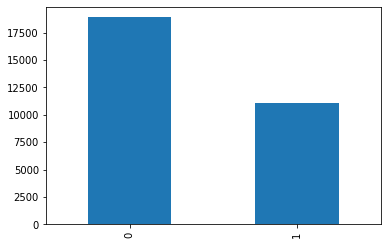

In [6]:
## Distrubition of duplication and non duplication

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("number of unique questions",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("number of question getting repeated", x[x].shape[0])

number of unique questions 55323
number of question getting repeated 3456


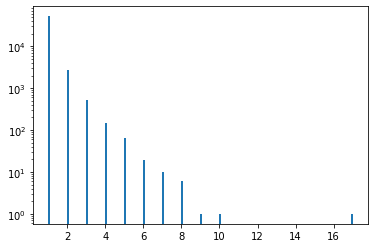

In [8]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [9]:
## Feature engineering
df['qsn1_len'] = df['question1'].str.len()
df['qsn2_len'] = df['question2'].str.len()

In [10]:
df['qsn1_word_len'] = df['question1'].str.split().str.len()
df['qsn2_word_len'] = df['question2'].str.split().str.len()

In [11]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len
327032,327032,104815,453414,What does it mean to claim zero allowances on ...,Why did my employer give me a W-9 Form to fill...,0,52,73,11,17
233188,233188,238242,343378,How many rbi branches are there in India?,Is the Finance Ministry or the RBI a better fu...,0,41,61,8,12
77190,77190,131838,131839,"If everything in a dollar store is $1, how doe...","How does Big Bazaar profit in a ""buy 1 get 1 f...",0,65,56,14,13
69224,69224,119475,119476,What is mean by capability curve?,What is generator capability curve?,1,33,35,6,5
188666,188666,287276,287277,What is this symbol?,What is this the symbol of?,0,20,27,4,6


In [12]:
def common_word(row):
    q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return len(q1 & q2)

In [13]:
set(map(lambda word: word.lower().strip(), 'hello iam sunil giri working on NLP project'.split(' ')))

{'giri', 'hello', 'iam', 'nlp', 'on', 'project', 'sunil', 'working'}

In [14]:
df['common_word'] = df.apply(common_word, axis=1)

In [15]:
def total_words(row):
    q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
    q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
    return (len(q1) + len(q2))

In [16]:
df['total_word'] = df.apply(total_words, axis=1)

In [17]:
df['word_share'] = round(df['common_word']/df['total_word'],2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share
327032,327032,104815,453414,What does it mean to claim zero allowances on ...,Why did my employer give me a W-9 Form to fill...,0,52,73,11,17,2,27,0.07
233188,233188,238242,343378,How many rbi branches are there in India?,Is the Finance Ministry or the RBI a better fu...,0,41,61,8,12,2,19,0.11


C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='qsn1_len', ylabel='Density'>

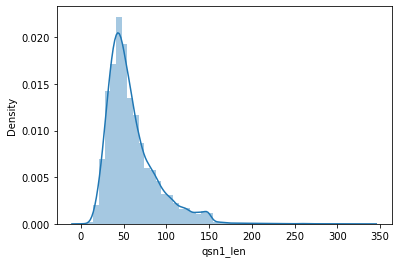

In [18]:
import seaborn as sns
sns.distplot(df['qsn1_len'])

In [19]:
df.describe()

,id,qid1,qid2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share
count,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,201300.601900,216937.256333,220353.65070,0.370000,59.638667,59.857067,10.952200,11.137700,4.520667,21.091633,0.224099
std,117195.815746,157994.485738,159956.95711,0.482812,30.064668,34.572458,5.453553,6.472388,3.101810,8.614680,0.128476
min,32.000000,32.000000,38.00000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,4.000000,0.000000
25%,99441.500000,73947.500000,73424.50000,0.000000,40.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.120000
50%,200795.500000,191105.500000,195505.00000,0.000000,52.000000,50.000000,10.000000,9.000000,4.000000,19.000000,0.220000
75%,302859.500000,346279.000000,352864.25000,1.000000,72.000000,71.000000,13.000000,13.000000,6.000000,25.000000,0.320000
max,404277.000000,537871.000000,537918.00000,1.000000,334.000000,1151.000000,68.000000,237.000000,27.000000,149.000000,0.500000


C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


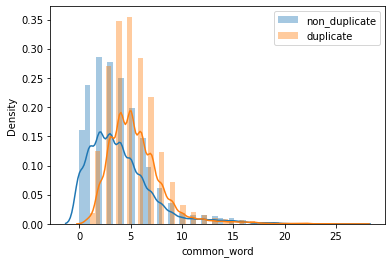

In [20]:
sns.distplot(df[df['is_duplicate']==0]['common_word'],label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['common_word'],label='duplicate')
plt.legend()
plt.show()

C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


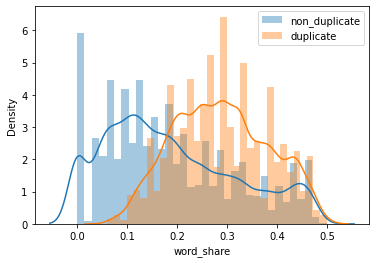

In [21]:
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [22]:
temp_df = df[['question1', 'question2']]
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share
327032,327032,104815,453414,What does it mean to claim zero allowances on ...,Why did my employer give me a W-9 Form to fill...,0,52,73,11,17,2,27,0.07
233188,233188,238242,343378,How many rbi branches are there in India?,Is the Finance Ministry or the RBI a better fu...,0,41,61,8,12,2,19,0.11
77190,77190,131838,131839,"If everything in a dollar store is $1, how doe...","How does Big Bazaar profit in a ""buy 1 get 1 f...",0,65,56,14,13,4,25,0.16
69224,69224,119475,119476,What is mean by capability curve?,What is generator capability curve?,1,33,35,6,5,4,11,0.36
188666,188666,287276,287277,What is this symbol?,What is this the symbol of?,0,20,27,4,6,3,10,0.30


In [23]:
new_df = df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(new_df.shape)
new_df.head()

(30000, 8)


,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share
327032,0,52,73,11,17,2,27,0.07
233188,0,41,61,8,12,2,19,0.11
77190,0,65,56,14,13,4,25,0.16
69224,1,33,35,6,5,4,11,0.36
188666,0,20,27,4,6,3,10,0.30


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(temp_df['question1']) + list(temp_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [25]:
temp_df1 = pd.DataFrame(q1_arr,index=temp_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=temp_df.index)
temp_new = pd.concat([temp_df1, temp_df2], axis=1)
temp_new.shape

(30000, 6000)

In [26]:
final_df = pd.concat([new_df, temp_new], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,qsn1_len,qsn2_len,qsn1_word_len,qsn2_word_len,common_word,total_word,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
327032,0,52,73,11,17,2,27,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
233188,0,41,61,8,12,2,19,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
77190,0,65,56,14,13,4,25,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
69224,1,33,35,6,5,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
188666,0,20,27,4,6,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=10)

In [28]:
print(X_train.shape)
print(X_test.shape)

(24000, 6007)
(6000, 6007)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7708333333333334


In [30]:
# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
# from tensorflow.keras.models import Model

In [31]:
# # Define the input shape
# input_shape = (107,)

# # Define the embedding size
# embedding_size = 100

# # Define the number of LSTM units
# lstm_units = 128

# # Define the number of classes
# num_classes = 1

# # Define the input layer
# inputs = Input(shape=input_shape)

# # Define the embedding layer
# embedding_layer = Embedding(input_dim=5000, output_dim=embedding_size)(inputs)

# # Define the LSTM layer
# lstm_layer = LSTM(units=lstm_units)(embedding_layer)

# # Define the output layer
# outputs = Dense(units=num_classes, activation='softmax')(lstm_layer)

# # Define the model
# model = Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, verbose=1)